# GPR model - Frequency and time domain

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from empymod.model import dipole
from empyscripts import fdesign

# Style adjustments
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['text.usetex'] = True  # Comment this if you don't have LaTeX. You might have to adjust some strings.
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.style'] = 'normal'

## Calculate/get data f-domain
Parameters as in Hunziker et al., 2015

In [2]:
f = np.linspace(0.5, 850, 300)*1e6
finp = {'src': [0, 0, 0.0000001],
        'rec': [[0.2, 2.0, 3.0], [0, 0, 0], 0.5],
        'depth': [0, 1],
        'res': [2e14, 200, 20],
        'ab': 11,
        'epermH': [1, 9, 15],
        'epermV': [1, 9, 15],
        'loop': 'off', 'verb': 2, 'freqtime': f, 'opt': 'spline'}

In [3]:
try:
    fgprDLF = np.load('data/GPR-DLF-Frequency.npy')
except:
    fgprDLF = dipole(ht='fht', htarg=fdesign.load_filter('wer2001'), **finp)
    np.save('data/GPR-DLF-Frequency', fgprDLF)
try:
    fgprQUA = np.load('data/GPR-QUA-Frequency.npy')
except:
    fgprQUA = dipole(ht='quad', htarg=['', '', 51, '', 160, 500], **finp)
    np.save('data/GPR-QUA-Frequency', fgprQUA)

## Calculate/get data t-domain
Parameters as in Hunziker et al., 2015

In [4]:
# Check indices for offsets of 0.2, 2, and 3 m.
x = np.r_[0.001, np.arange(1, 201)*.02]  # Offsets as used in GPR-create-data.ipynb
print(x[10], x[100], x[150])

t = np.r_[0.001, np.arange(1, 321)]/4*1e-9  # Times as used in GPR-create-data.ipynb

# Load data
gprQUA = np.load('data/GPR-QUA.npy')
gprDLF = np.load('data/GPR-DLF.npy')

0.2 2.0 3.0


## Plot

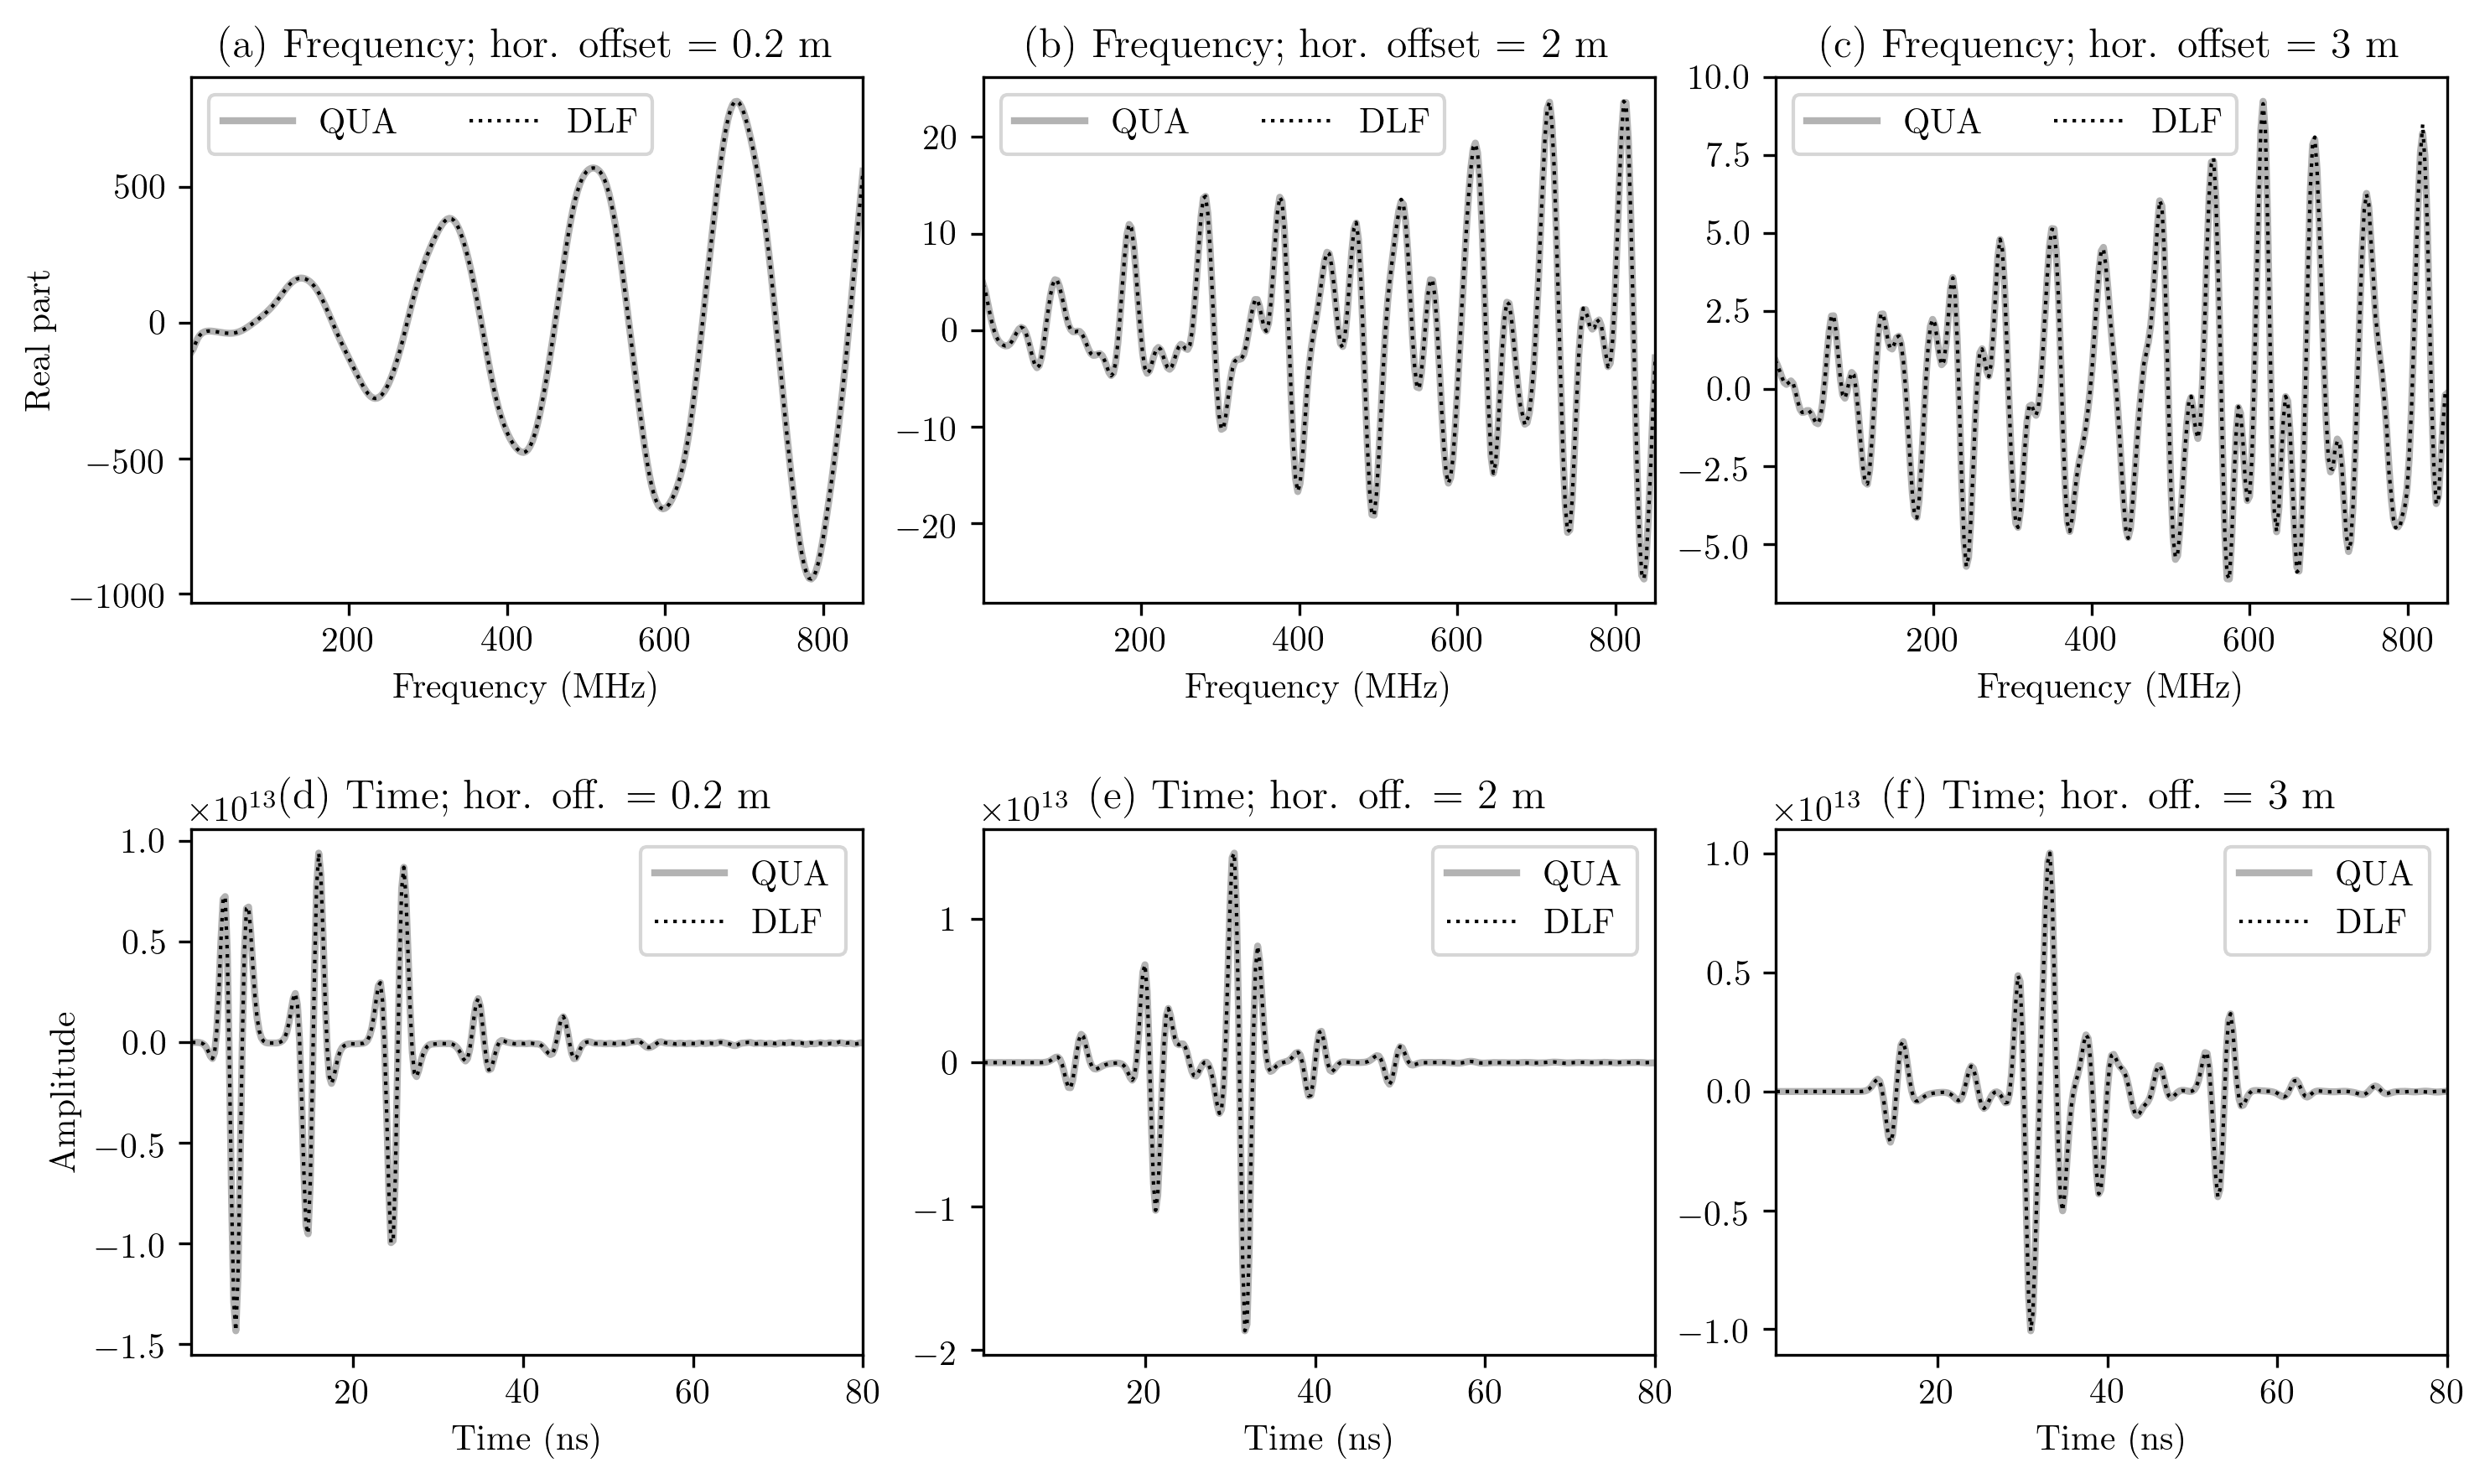

In [5]:
plt.figure(figsize=(10, 6))
xlim = [1, 850]

# f-domain

# 1: x = 0.2 m ; Response
plt.subplot(231)
plt.title('(a) Frequency; hor. offset = 0.2 m')
plt.ylabel('Real part')
plt.plot(f/1e6, fgprQUA[:, 0].real, '.7', lw=2, label='QUA')
plt.plot(f/1e6, fgprDLF[:, 0].real, 'k:', lw=1, label='DLF')
plt.legend(ncol=2)
plt.xlim(xlim)
plt.xlabel('Frequency (MHz)')

# 2: x = 2 m ; Response
plt.subplot(232)
plt.title('(b) Frequency; hor. offset = 2 m')
plt.plot(f/1e6, fgprQUA[:, 1].real, '.7', lw=2, label='QUA')
plt.plot(f/1e6, fgprDLF[:, 1].real, 'k:', lw=1, label='DLF')
plt.legend(ncol=2)
plt.xlim(xlim)
plt.xlabel('Frequency (MHz)')

# 3: x = 3 m ; Response
plt.subplot(233)
plt.title('(c) Frequency; hor. offset = 3 m')
plt.plot(f/1e6, fgprQUA[:, 2].real, '.7', lw=2, label='QUA')
plt.plot(f/1e6, fgprDLF[:, 2].real, 'k:', lw=1, label='DLF')
plt.legend(ncol=2)
plt.xlim(xlim)
plt.xlabel('Frequency (MHz)')


# t-domain
xlim = [1, 80]

# 1: x = 0.2 m ; Response
plt.subplot(234)
plt.title('(d) Time; hor. off. = 0.2 m')
plt.ylabel('Amplitude')
plt.plot(t*1e9, gprQUA[:, 10], '.7', lw=2, label='QUA')
plt.plot(t*1e9, gprDLF[:, 10], 'k:', lw=1, label='DLF')
plt.xlabel('Time (ns)')
plt.legend()
plt.xlim(xlim)

# 2: x = 2 m ; Response
plt.subplot(235)
plt.title('(e) Time; hor. off. = 2 m')
plt.plot(t*1e9, gprQUA[:, 100], '.7', lw=2, label='QUA')
plt.plot(t*1e9, gprDLF[:, 100], 'k:', lw=1, label='DLF')
plt.xlabel('Time (ns)')
plt.legend()
plt.xlim(xlim)

# 3: x = 3 m ; Response
plt.subplot(236)
plt.title(r'(f) Time; hor. off. = 3 m')
plt.plot(t*1e9, gprQUA[:, 150], '.7', lw=2, label='QUA')
plt.plot(t*1e9, gprDLF[:, 150], 'k:', lw=1, label='DLF')
plt.xlabel('Time (ns)')
plt.legend()
plt.xlim(xlim)

plt.tight_layout(h_pad=2, w_pad=.2)

# Save figure and show it
plt.savefig('../figures/ftGPR.pdf', bbox_inches='tight')
plt.show()

## Calculate/get data f-domain of 2nd model

In [6]:
f = np.linspace(0.5, 850, 300)*1e6
finp = {'src': [0, 0, 0.0000001],
        'rec': [[0.2, 2.0, 3.0], [0, 0, 0], 0.5],
        'depth': [0, 1],
        'res': [2e14, 20, 200],
        'ab': 11,
        'epermH': [1, 15, 9],
        'epermV': [1, 15, 9],
        'loop': 'off', 'verb': 2, 'freqtime': f, 'opt': 'spline'}

In [7]:
try:
    fgprDLF2 = np.load('data/GPR-DLF-Frequency2.npy')
except:
    fgprDLF2 = dipole(ht='fht', htarg=fdesign.load_filter('wer2001'), **finp)
    np.save('data/GPR-DLF-Frequency2', fgprDLF2)
try:
    fgprQUA2 = np.load('data/GPR-QUA-Frequency2.npy')
except:
    fgprQUA2 = dipole(ht='quad', htarg=['', '', 51, '', 160, 500], **finp)
    np.save('data/GPR-QUA-Frequency2', fgprQUA2)

## Plot

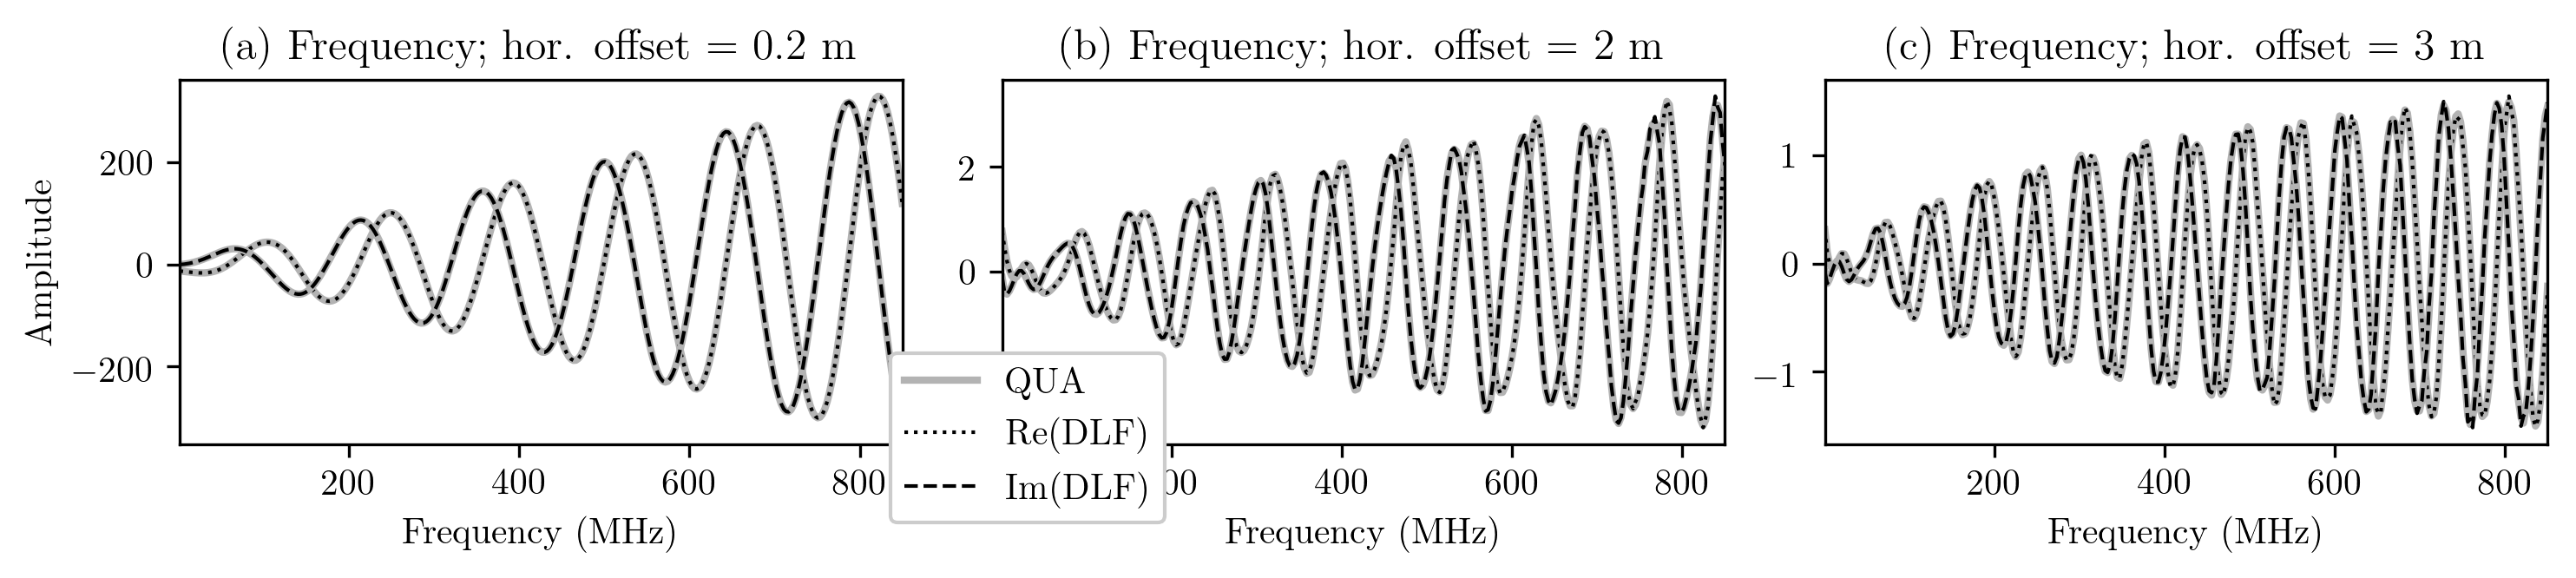

In [8]:
plt.figure(figsize=(10, 4))
xlim = [1, 850]

# f-domain

# 1: x = 0.2 m ; Response
plt.subplot(231)
plt.title('(a) Frequency; hor. offset = 0.2 m')
plt.ylabel('Amplitude')
plt.plot(f/1e6, fgprQUA2[:, 0].real, '.7', lw=2, label='QUA')
plt.plot(f/1e6, fgprDLF2[:, 0].real, 'k:', lw=1, label='DLF')
plt.plot(f/1e6, fgprQUA2[:, 0].imag, '.7', lw=2)
plt.plot(f/1e6, fgprDLF2[:, 0].imag, 'k--', lw=1, label='DLF')
plt.xlim(xlim)
plt.xlabel('Frequency (MHz)')

# 2: x = 2 m ; Response
plt.subplot(232)
plt.title('(b) Frequency; hor. offset = 2 m')
plt.plot(f/1e6, fgprQUA2[:, 1].real, '.7', lw=2, label='QUA')
plt.plot(f/1e6, fgprDLF2[:, 1].real, 'k:', lw=1, label='Re(DLF)')
plt.plot(f/1e6, fgprQUA2[:, 1].imag, '.7', lw=2)
plt.plot(f/1e6, fgprDLF2[:, 1].imag, 'k--', lw=1, label='Im(DLF)')
l = plt.legend(loc=1, bbox_to_anchor=(0.25, 0.3))
l.get_frame().set_alpha(1)
plt.xlim(xlim)
plt.xlabel('Frequency (MHz)')

# 3: x = 3 m ; Response
plt.subplot(233)
plt.title('(c) Frequency; hor. offset = 3 m')
plt.plot(f/1e6, fgprQUA2[:, 2].real, '.7', lw=2, label='QUA')
plt.plot(f/1e6, fgprDLF2[:, 2].real, 'k:', lw=1, label='DLF')
plt.plot(f/1e6, fgprQUA2[:, 2].imag, '.7', lw=2)
plt.plot(f/1e6, fgprDLF2[:, 2].imag, 'k--', lw=1, label='DLF')
plt.xlim(xlim)
plt.xlabel('Frequency (MHz)')

plt.tight_layout(h_pad=2, w_pad=.2)

# Save figure and show it
plt.savefig('../figures/ftGPR2nd.pdf', bbox_inches='tight')
plt.show()

In [9]:
import printinfo
printinfo.info()